In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("AirPassengers.csv")

In [4]:
df.columns = ['Date', 'Number of Passengers']

In [5]:
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## **Visualize time series data** ##

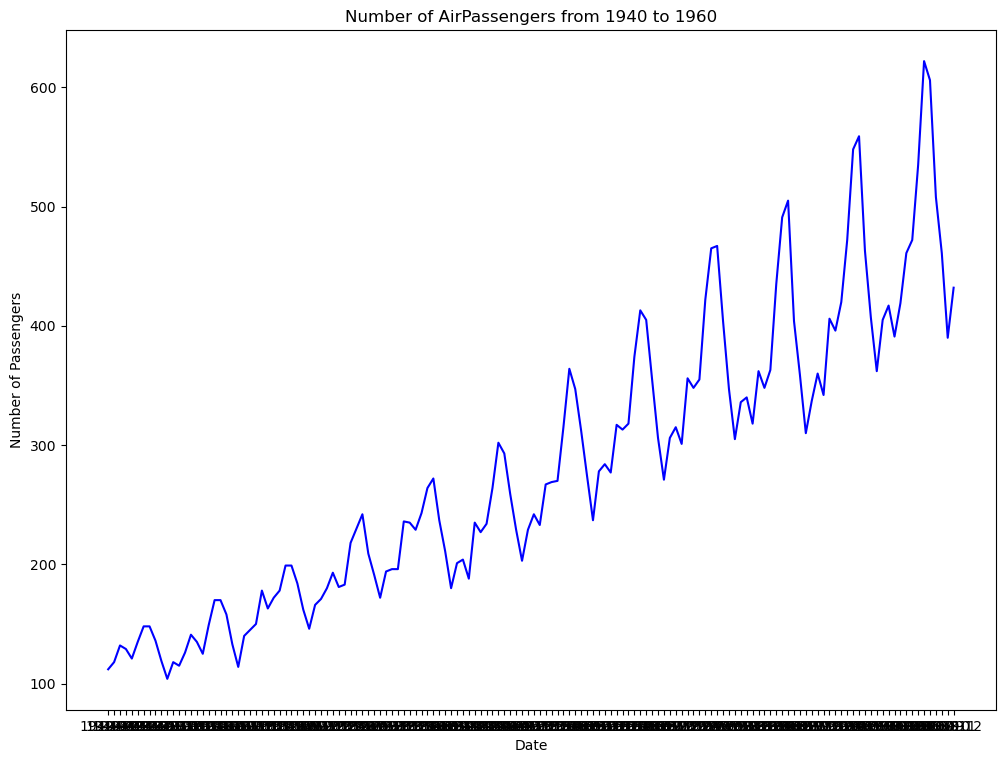

In [6]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize = (12,9), dpi = dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title = title, xlabel=xlabel, ylabel=ylabel)
    
plot_df(df, x=df['Date'], y=df['Number of Passengers'], title = "Number of AirPassengers from 1940 to 1960")

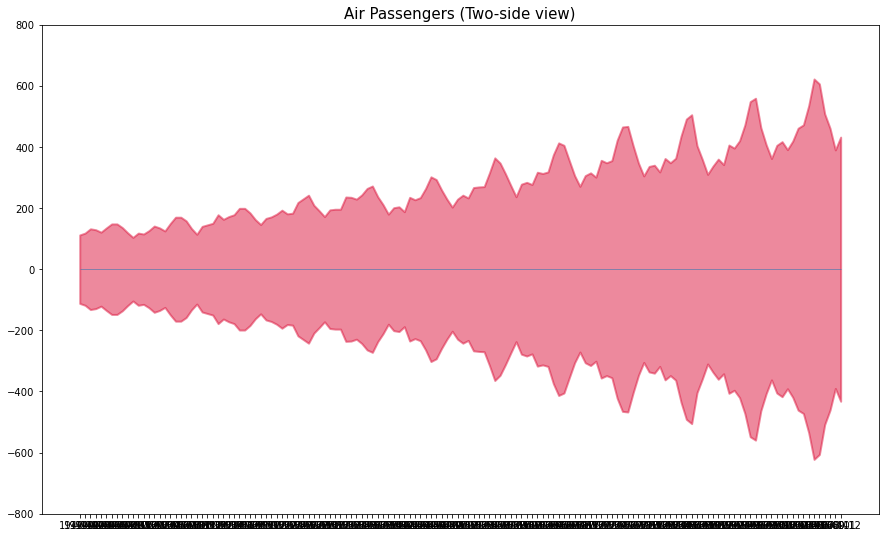

In [7]:
x = df['Date'].values
y1 = df['Number of Passengers']

#Plot
fig, ax = plt.subplots(1,1, figsize=(15,9), dpi=72)
plt.fill_between(x,y1=y1,y2=-y1,alpha=0.5, linewidth=2, color='crimson')
plt.ylim(-800,800)
plt.title("Air Passengers (Two-side view)", fontsize = 15)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=0.5)


According to the graph, this is a monthly time series and follows certain patterns every year. 
We can plot each year as a separate line in a same plot to make year-wise comparison.

## **Patterns in Time Series** ##

Any time series visualization may consist of the following: **Base Level + Trend + Seasonality + Error**

### **Trend** ###

When there is an upward or downward line in a time series. 

### **Seasonality** ###

When there is a DISTINCT REPEATED pattern observed between regular intervals due to interval factors. 

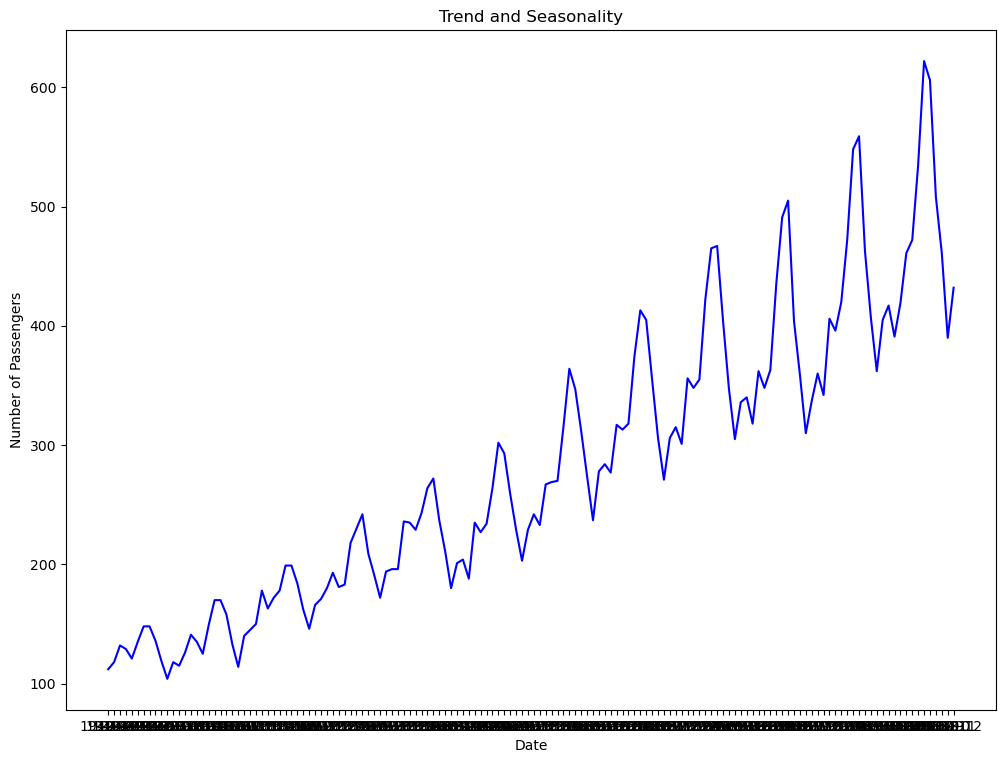

In [8]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize = (12,9), dpi = dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title = title, xlabel=xlabel, ylabel=ylabel)
    
plot_df(df, x=df['Date'], y=df['Number of Passengers'], title = "Trend and Seasonality")

### **Cyclic Behavior** ###

* It happens when the rise or fall in time series does not match calendar-based intervals
* Cyclic behavior occurs due to socio-economy factors

## **Additive and Multiplicative Time Series** ##

#### **Additive time series** :
Value = Base Level + Trend + Seasonality + Error

#### **Multiplicative Time Series** :
Value = Base Level x Trend x Seasonality x Error


## **Decomposition of a Time Series** ##

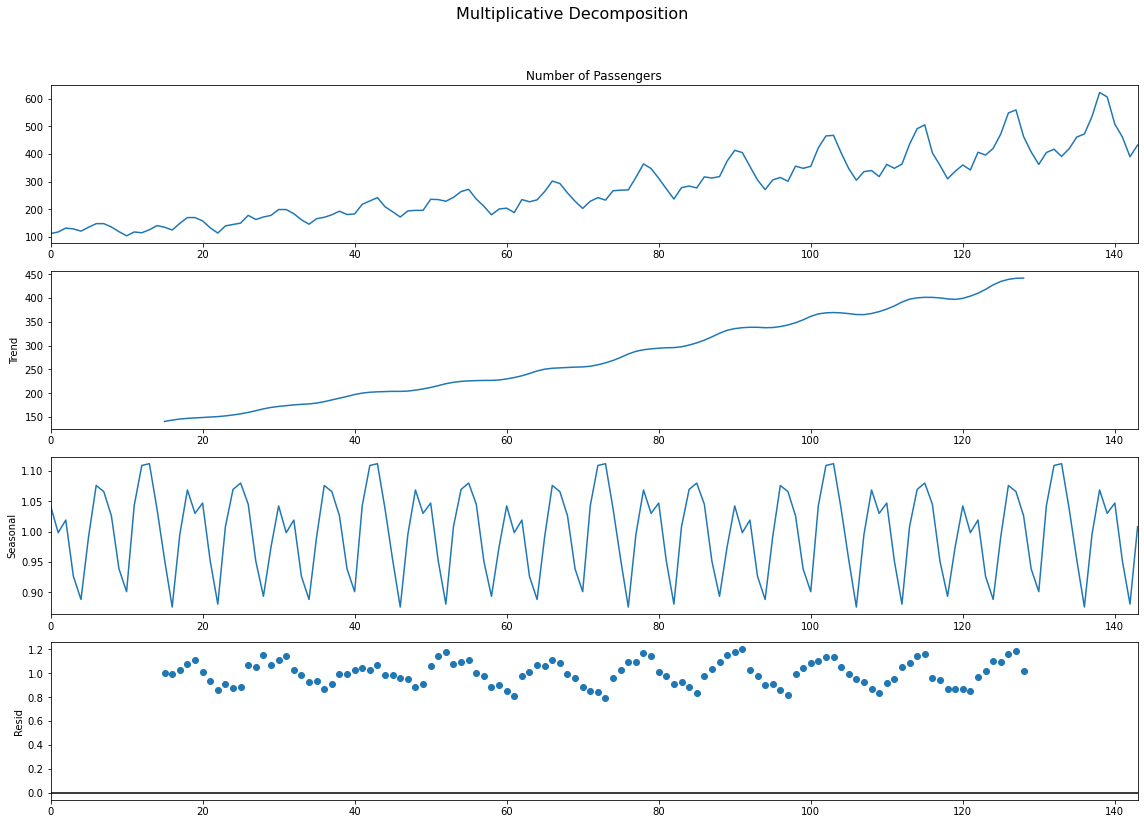

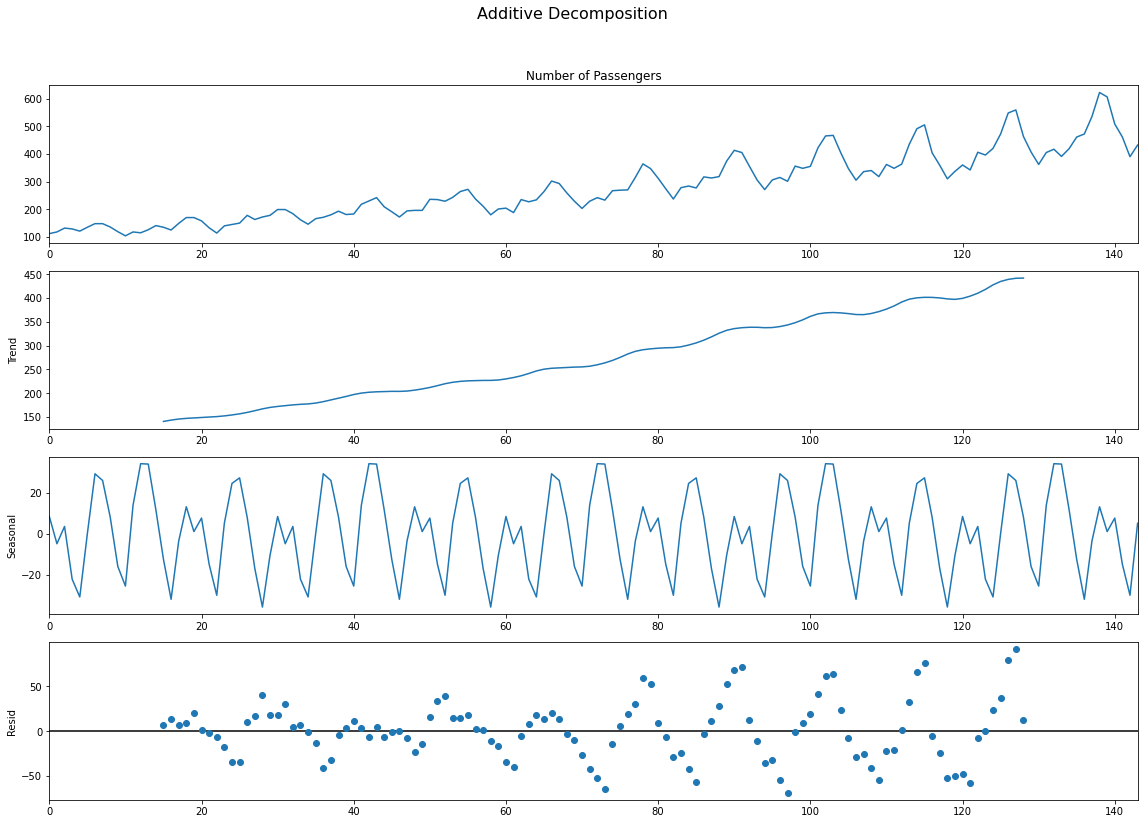

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

#Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(x=df['Number of Passengers'], model='multiplicative', period=30)

#Additive Decomposition
additive_decomposition = seasonal_decompose(x=df['Number of Passengers'], model='additive', period = 30)

#Plot
plt.rcParams.update({'figure.figsize': (16,12)})

multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize = 16)
plt.tight_layout(rect=[0,0.03,1,0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize = 16)
plt.tight_layout(rect=[0,0.03,1,0.95])

* Residuals/Error in the additive model has patter
* Residuals/Error in multiplicative looks more random, which is good. Therefore, we will use multiplicative decomposition for this series.

## **Stationarity in Time Series** ##

Stationary time series has a particular behavior over time. There is high probability that it will follow the same pattern in the future.
Criteria of stationary:
* Constant Mean
* Constant Variance
* Autocovariance that do not depend on time
When data meet these 3 criteria, we can apply Time Series analysis


![Stationary and Non-Stationary Time Series](https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1)

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1

If data is not stationary, we need to transform the data so that it become suitable for time series analysis. 

## **How to make time series stationary** ##

There are several methods we can use to transform data:
* Differencing the series (one or more)
* Take log of the series
* Take nth root of the series
* Combine all of the above

*The most common and convenient way is to difference time series, at least one, or until it becomes stationary.*

### **Differencing Method** ###

* If Y_t is the value at time t, then the first difference Y = Yt - Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.
* If the first difference does not make the series stationary, we can go for the second differencing and so on
* For example, consider the following series: [1, 5, 2, 12, 20]
* First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]
* Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]


### **Why do we need to make data stationary** ###

* Forecasting stationary is relatively easy and the forecast is reliable
* Autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors
    **Autoregressive models predict the future based on the past. It implicitly assumes the the future will resemble the past. That's why we need a stationary time series for forecasting.

* Linear regression works best when X variables are not correlated against each other. Stationarizing step will help remove persistent autocorrelation, making the predictions (lags of the series) in the forecasting models nearly independent.

## **How to test for stationarity** ##

The most popular method is Augmented Dickey Fuller (ADF) Test

In [10]:
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey-Fuller test: ")

dftest = adfuller(df['Number of Passengers'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value',
                                         '# lags used', '# observations used'])
for key, value in dftest[4].items():
    dfoutput['Criticial Valued(%s)' %key] = value
print(dfoutput)

Results of Dickey-Fuller test: 
Test Statistics            0.815369
p-value                    0.991880
# lags used               13.000000
# observations used      130.000000
Criticial Valued(1%)      -3.481682
Criticial Valued(5%)      -2.884042
Criticial Valued(10%)     -2.578770
dtype: float64


In ADF test, the null hypothesis is that the time series data is non-stationary. When p-vale in the test is less than the significance level (alpha=0.05), we reject the null hypothesis. 
In this scenario, since p-value is larger than 0.05, we don't reject the null hypothesis, meaning that the time series data is not stationary. 

## **White Noise** ##

* A time series is a white noise when variables are independent and identicaly distributed with mean = 0
* All variables have the same variance
* Each value has a zero correlation with all other values in the series

Source: https://machinelearningmastery.com/white-noise-time-series-python/#:~:text=A%20time%20series%20is%20white%20noise%20if%20the%20variables%20are,other%20values%20in%20the%20series.

<AxesSubplot:title={'center':'Random white noise'}>

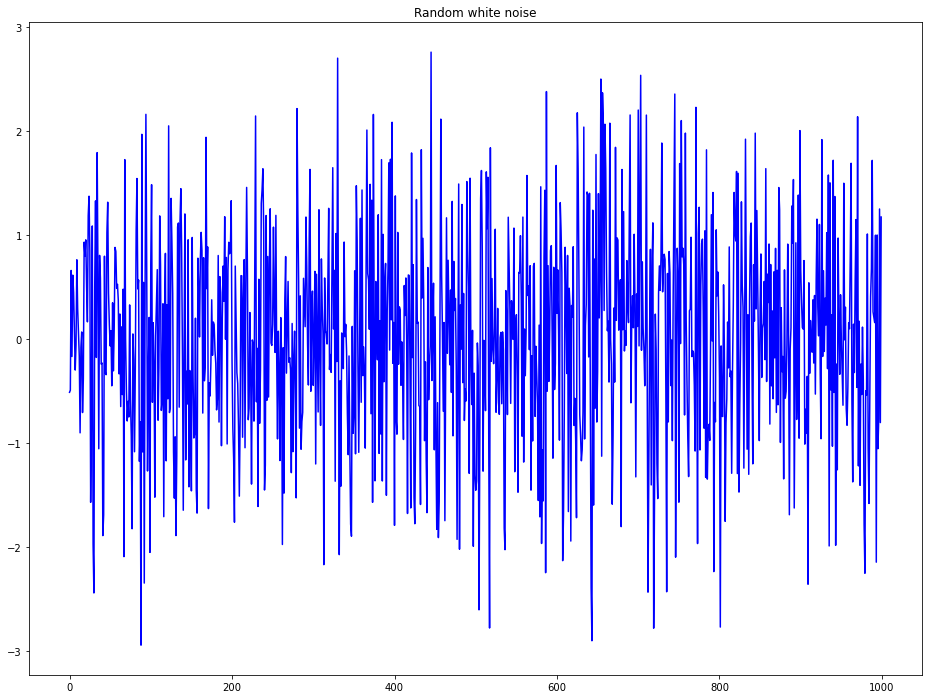

In [11]:
rand_number = np.random.randn(1000)
pd.Series(rand_number).plot(title="Random white noise", color = 'blue')

## **Detrend Time Series** ##

- Detrending a time series means to remove the trend component from the time series. There are multiple approaches of doing this as listed below:


1. Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, we may want to use quadratic terms (x^2) in the model.

2. We subtract the trend component obtained from time series decomposition.

3. Subtract the mean.

4. Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.


Now, we will implement the first two methods to detrend a time series.


Use **scipy.signal.detrend** to remove linear trend

In [12]:
import scipy

Text(0.5, 1.0, 'Air Passengers detrended by substracting line of best fit')

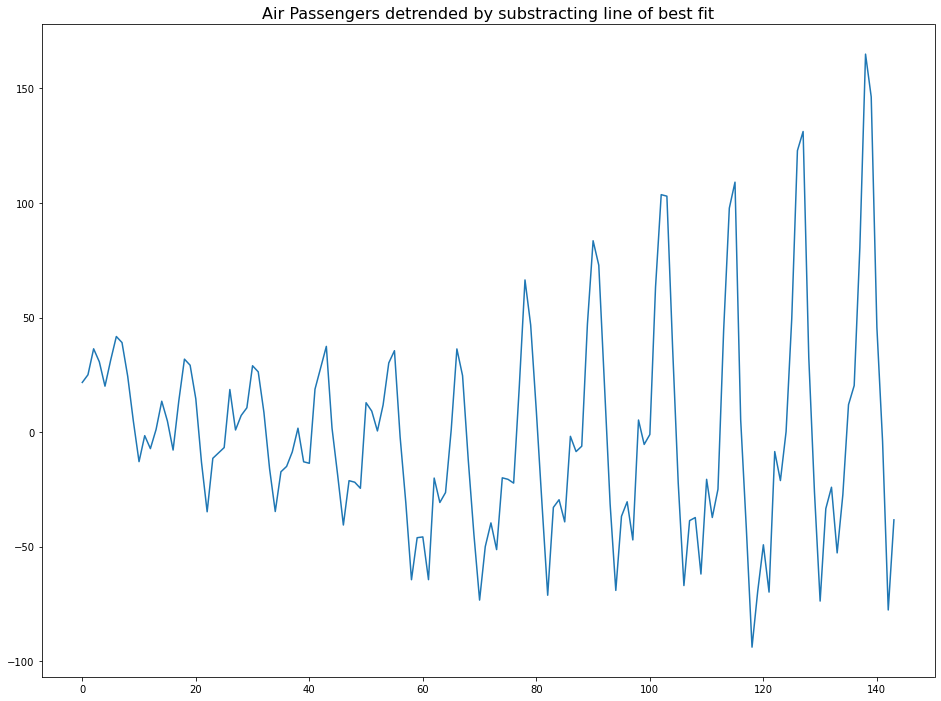

In [13]:
from scipy import signal
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title("Air Passengers detrended by substracting line of best fit", fontsize=16)

Subtract trend component from time series decomposition

Text(0.5, 1.0, 'Air Passengers detrended by subtracting trend component')

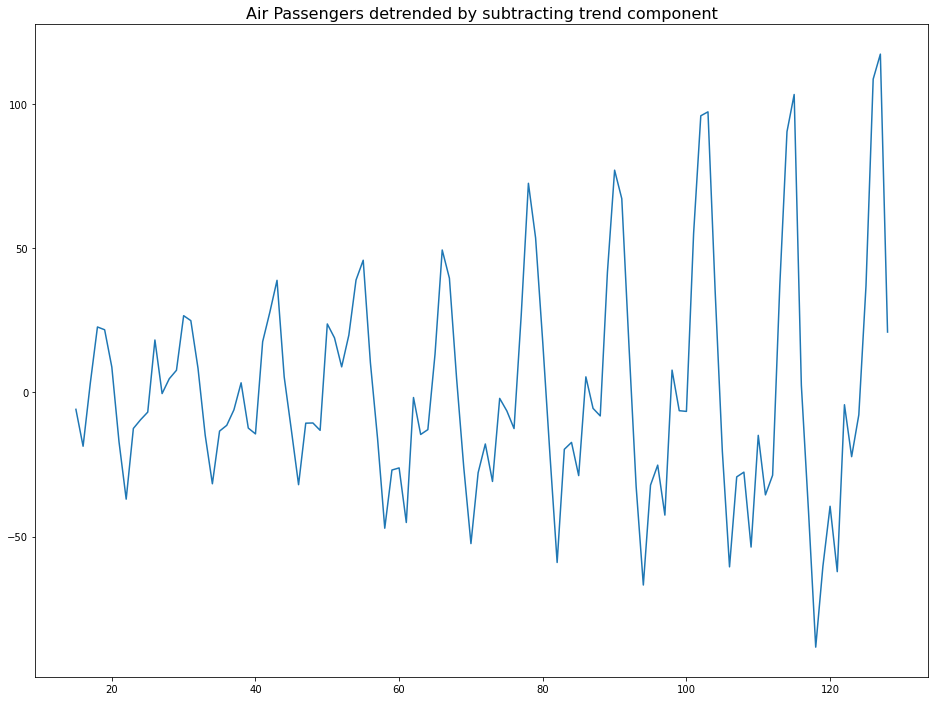

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Number of Passengers'], model = 'multiplicative', period=30)
detrended = df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title("Air Passengers detrended by subtracting trend component", fontsize = 16)

## **Deseasonalize a Time Series** ##




There are multiple approaches to deseasonalize a time series. These approaches are listed below:


- 1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.

- 2. Seasonal difference the series (subtract the value of previous season from the current value).

- 3. Divide the series by the seasonal index obtained from STL decomposition.



If dividing by the seasonal index does not work well, we will take a log of the series and then do the deseasonalizing. We will later restore to the original scale by taking an exponential.

Text(0.5, 1.0, 'Air Passengers deseasonalized')

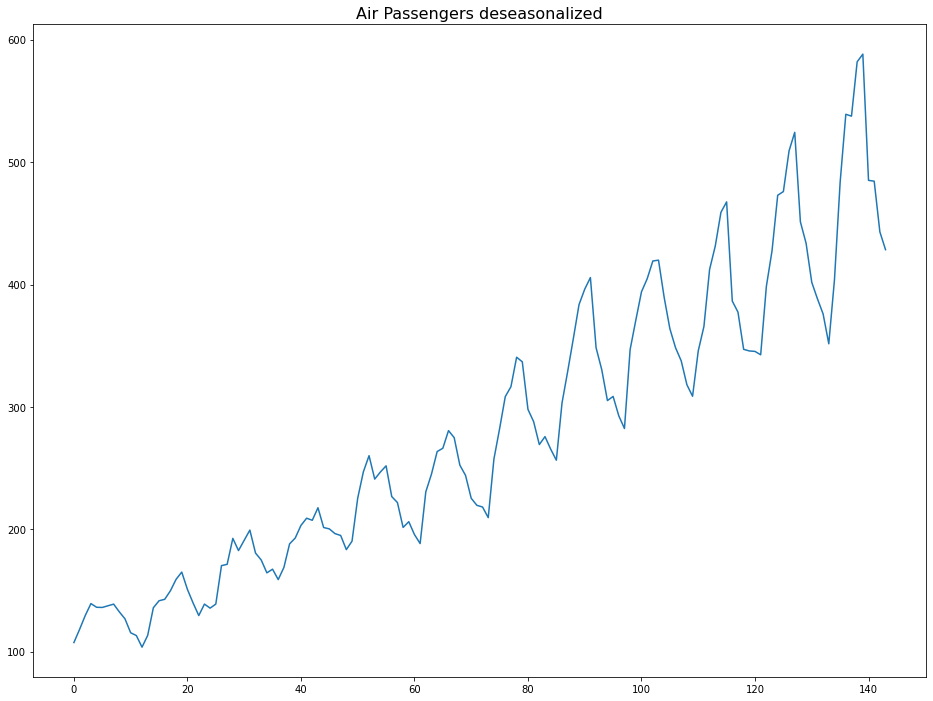

In [15]:
result_mul = seasonal_decompose(df['Number of Passengers'], model = 'multiplicative', period=30)

#Deseasonalized
deseasonalized = df['Number of Passengers'].values/result_mul.seasonal

#Plot
plt.plot(deseasonalized)
plt.title("Air Passengers deseasonalized", fontsize = 16)

## **Test for seasonality of Time Series** ##

We can use **autocorrelation function(ACF) plot** to detect seasonality. 
Autocorrelation in time series is when a time series linearly related to the lagged version of itself. So if there is seasonl trend, ACF plot would display **definitive repeated spikes** at the multiples of seasonal window

In [16]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

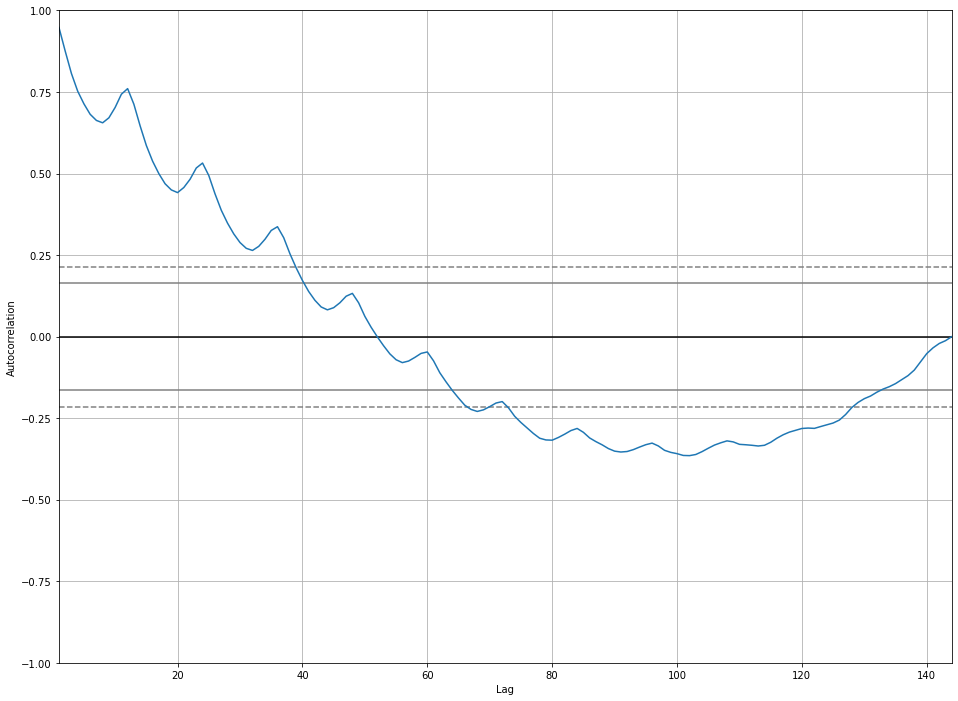

In [17]:
autocorrelation_plot(df['Number of Passengers'].tolist())

## **Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)** ##

* __Autocorrelation__ is the correlation between two values in a time series. Analysts record time-series data by measuring a characteristic at evenly spaced intervals—such as daily, monthly, or yearly. The number of intervals between the two observations is the lag. For example, the lag between the current and previous observation is one. If you go back one more interval, the lag is two, and so on.

* We use AFC to determine which lags have significant correlations, understand the patterns and properties of time series.

* In AFC, multiple correlations can exist, some have direct influence on the other and some have indirect impact.
* E.g.: 
<p> Let's say 𝑍
 has a direct influence on the variable 𝑋
. You can think of 𝑍
 as some economic parameter in US which is influencing some other economic parameter 𝑋
 of China.

Now it may be that a parameter 𝑌
 (some parameter in England) is also directly influenced by 𝑍
. But there is an independent relationship between 𝑋
 and 𝑌
 as well. By independence here I mean that this relationship is independent from 𝑍
.

So you see when 𝑍
 changes, 𝑋
 changes because of the direct relationship between 𝑋
 and 𝑍
, and also because 𝑍
 changes 𝑌
 which in turn changes 𝑋
. So 𝑋
 changes because of two reasons.
    Sources:
    https://stats.stackexchange.com/questions/483383/difference-between-autocorrelation-and-partial-autocorrelation#:~:text=Autocorrelation%20between%20X%20and%20Z,on%20X%20coming%20through%20Y.
</p>

 * __Partial Autocorrelation__ is similar to autocorellation except that it removes the intervening correlations, so correlation for each lag is unique.
 
 * In the above example, it is the removal of the intervening correlation of X by Y through Z. After removing that correlation, Z directly influence Y, and Z directly influence X but there is no correlation between X and Y.
 
 * PACF if used with ARIMA model.



/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


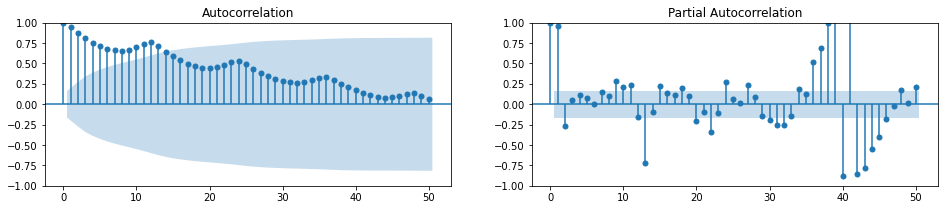

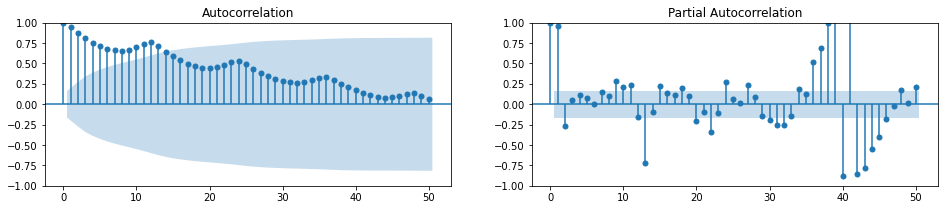

In [18]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plot
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

## **Lag Plots** ##

* A lag plot is a scatter plot of time series against a lag itself
* It's used to check for autocorrelation. If there is any pattern existing in the series, the series is **autocorrelated**. If there is no pattern existing, the series is likely to be **random with white noise** 


Text(0.5, 1.05, 'Lag plots of Air Passengers')

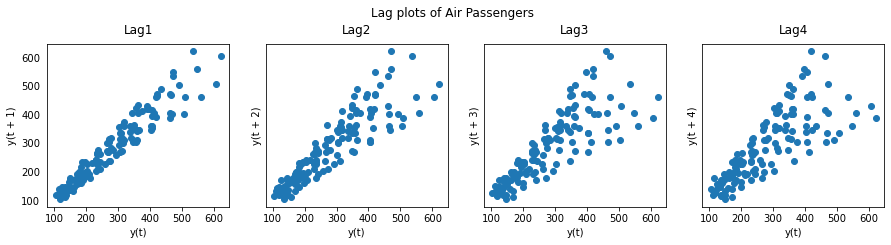

In [19]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left':False, 'axes.titlepad':10})

#Plot
fig,axes = plt.subplots(1,4, figsize=(15,3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax)
    ax.set_title('Lag' + str(i+1))
    
fig.suptitle('Lag plots of Air Passengers', y=1.05)